# 15. Supervised Finetuning to Reinforcemen learning

[ 중간 요약 ] : 거대한 두 단계를 다뤘음.

1. Pretraining (예를 들어, 수천개의 GPU장비에서 약 3개월 정도의 시간을 들임.)

Pretraining 단계를 거치면서, 인터넷의 텍스트 데이터를 손실압축한 결과물인 Base model ("internet document simulator", lossy compression of the internet)을 얻게 된다. 

이 Base Model 자체도 흥미로운 중간 결과물 _artifact이지만, 이 자체로는 다음 토큰을 계속해서 샘플링하는 기계이기 때문에 이를 직접 유용하게 사용하기는 어려움. 따라서, QA가 가능한 assistant로 바꾸기 위해,

2. Post-training: Supervised Finetuning (SFT) (예를 들어, 3시간 정도의 시간 소요)

Post-training 단계를 거쳐야 함. (*(1) QA 가능해지고, (2) helpful, truthful, and harmless한 Personality를 입히고 (3) hallucination을 완화시키고 (4) 사고에 유리한 CoT형식을 따르는 등의 바람직한 행동 양식을 갖추기 위함)

이 단계는 Pretraining과 알고리즘 및 아키텍처가 완전히 동일하고, 학습 데이터셋만 바뀜

: OpenAI와 같은 회사에서 만든 수백페이지 분량의 Labeling Instruction을 숙지한 사람들(전문 labeler)이 작성한 Instruct 데이터셋

: 최근 LLM발전으로 인해 이 Instruct 데이터셋을 모두 사람이 만들 필요는 없어졌음. LLM의 도움을 받아서 Synthetic Data로부터 출발하는 방법이 도임되고 있으나, 큐레이션 단계에서 사람의 개입이 어느정도는 들어갸야 함.

==> 이를 통해 QA가 가능한 Assistant를 얻었으면, 
Hallucination 이완을 위한 조치와, 
툴 사용 (검색 및 코딩)을 통해 더 정확한 답변을 하게 만드는 기법 등의 세부 미세조정을 거친다.

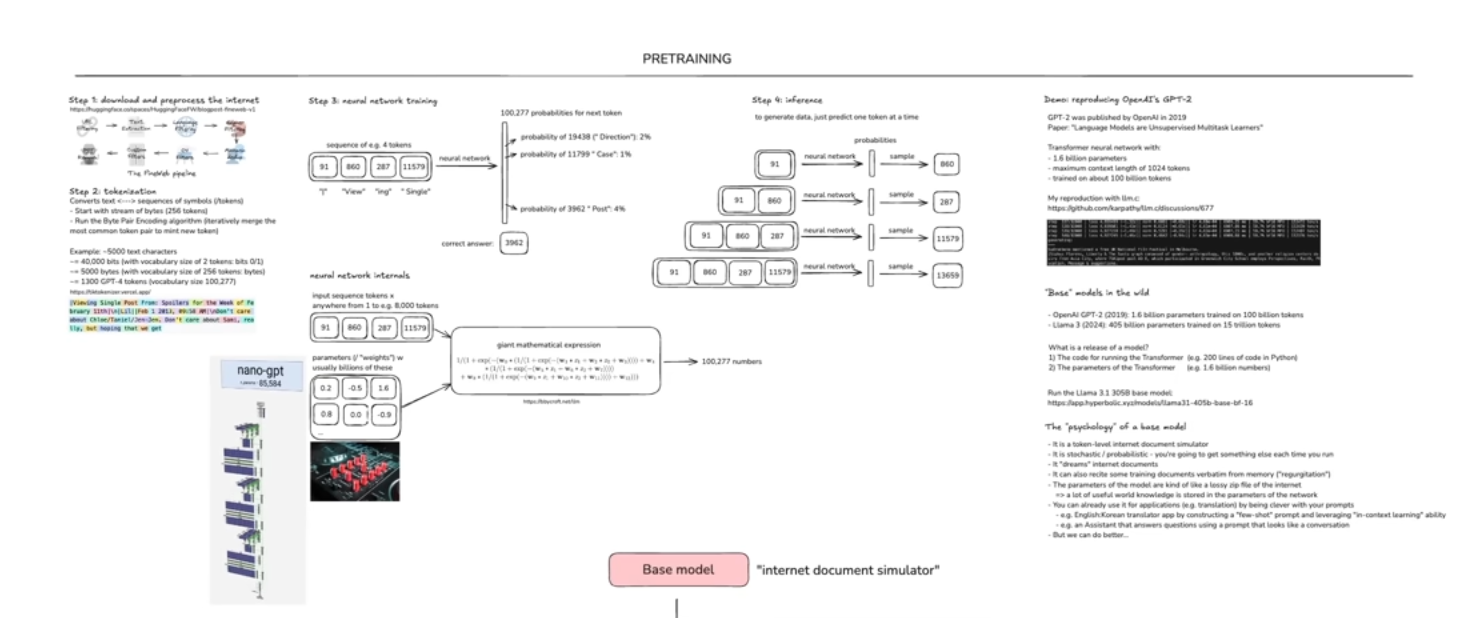

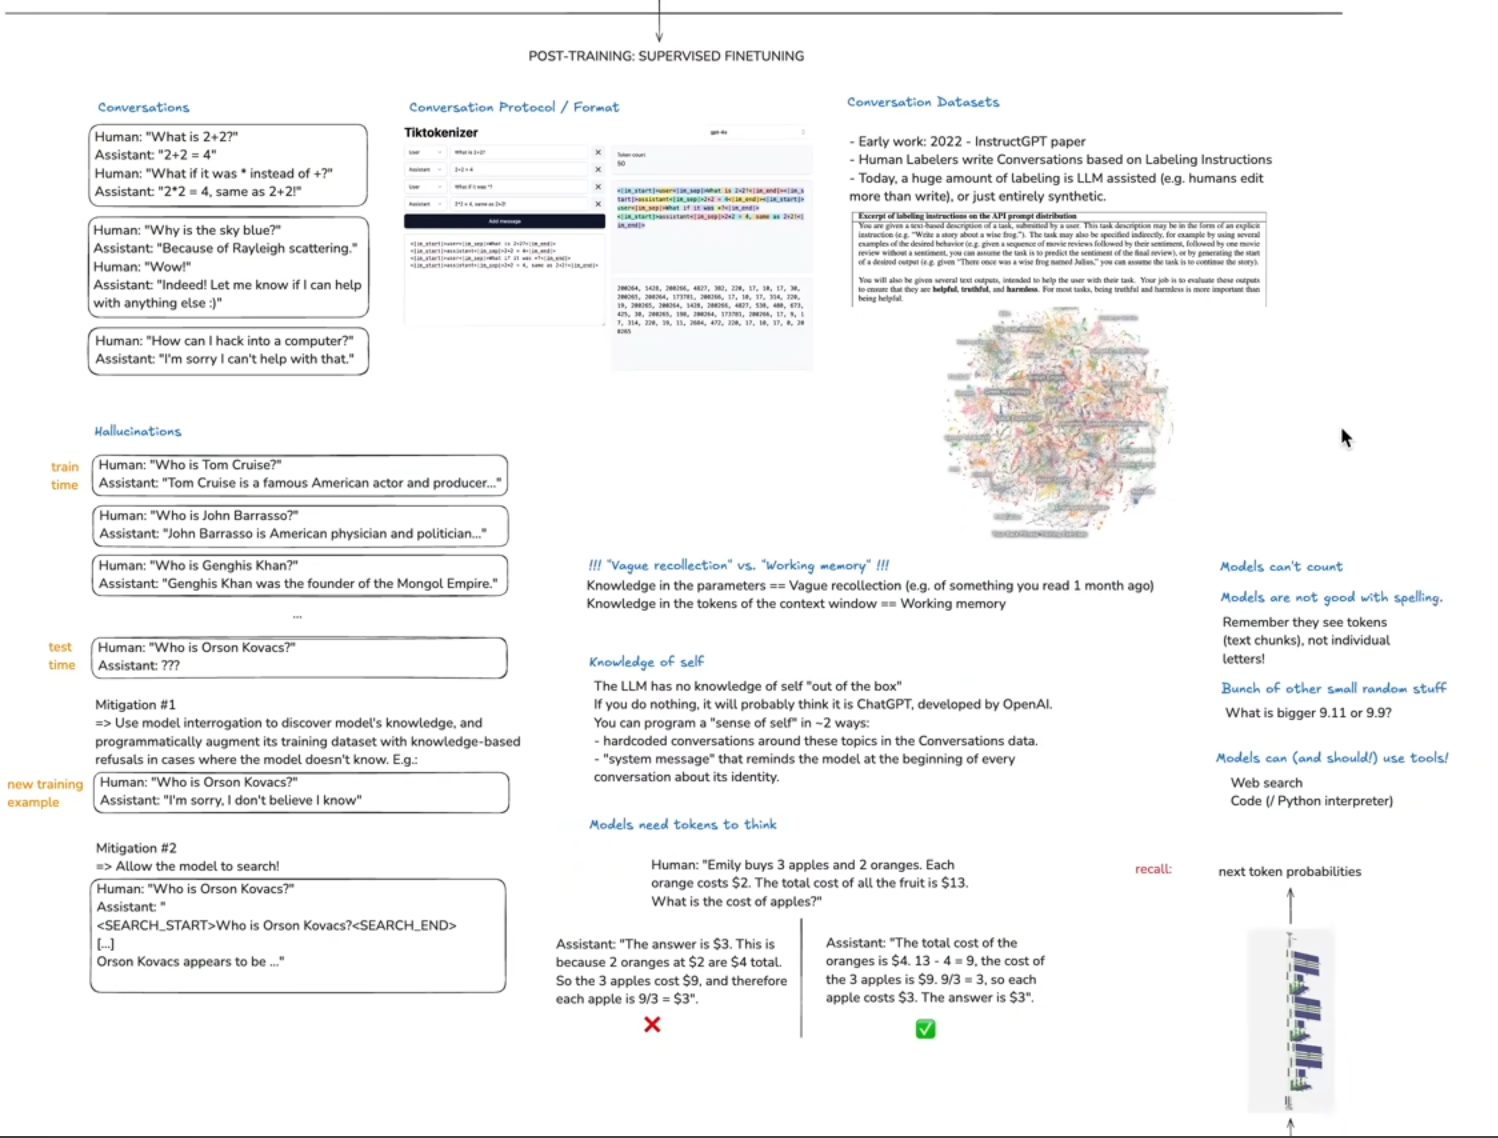

이제 이렇게 얻어진 SFT model을 가지고 마지막 단계인 Reinforcement Learning으로 넘어가보자.

Post-Training의 하위에 놓기는 하지만, 세번째 주요 단계로 구분해서 보는 것이 맞음.

예를 들어, OpenAI같은 경우에, 각각 다른 팀이 맡고 있음. 

: Pretraining을 위한 데이터를 맡은 팀 별도 존재,

: Pretraining에서 학습 단계를 맡은 팀 별도 존재,

: Post-training 중 Supervised FineTuning 단계에서 사용할 데이터를 만들어내는 팀 별도 존재,

: Post-training 중 Reinforcement Learning단계를 맡은 팀 별도로 존재.
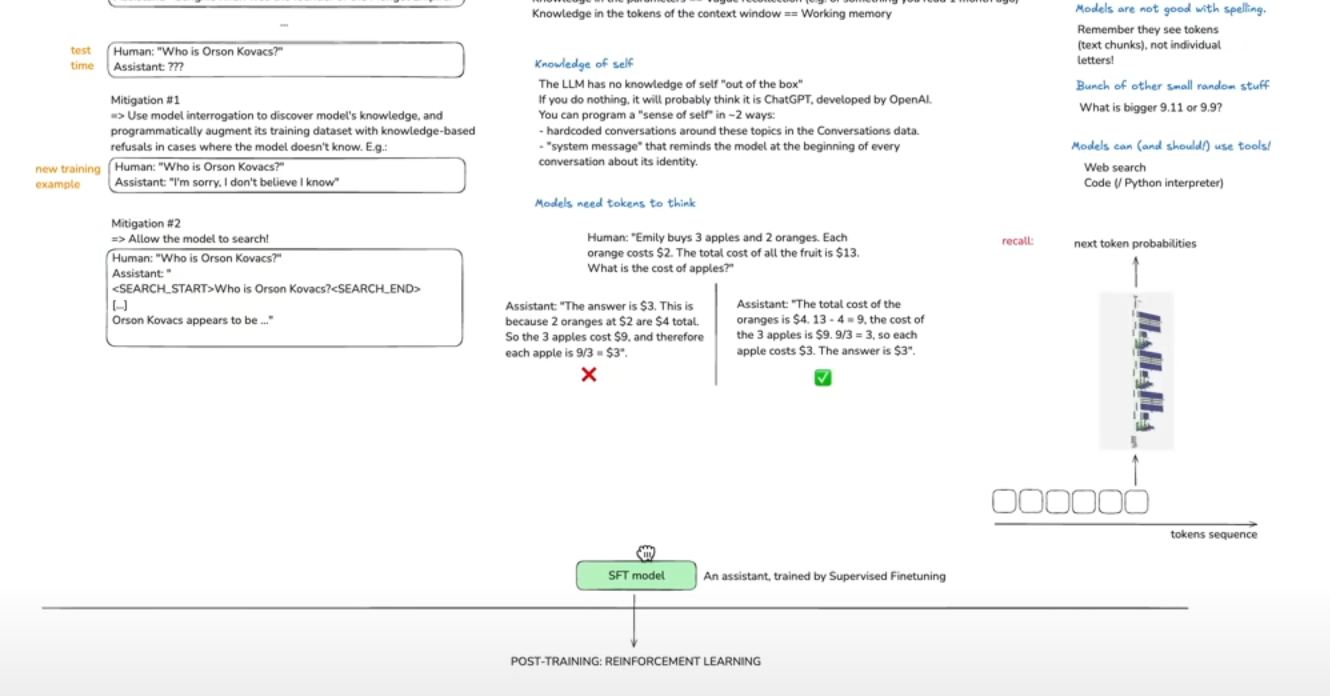


LLM을 데리고 학교에 데리고 간다고 했을 때,

1. 배경 지식을 얻는 Pretraining 단계를 거쳐서 (파란색 화살표)
2. 전문가의 해설이 곁들여진 연습문제를 거치면서 SFT를 거친 assistant를 얻어내고, (빨간색)
3. 각 문제에 대한 최종 정답만을 갖고 이런저런 솔루션을 찾아내는 RL 과정을 거침 (초록색))

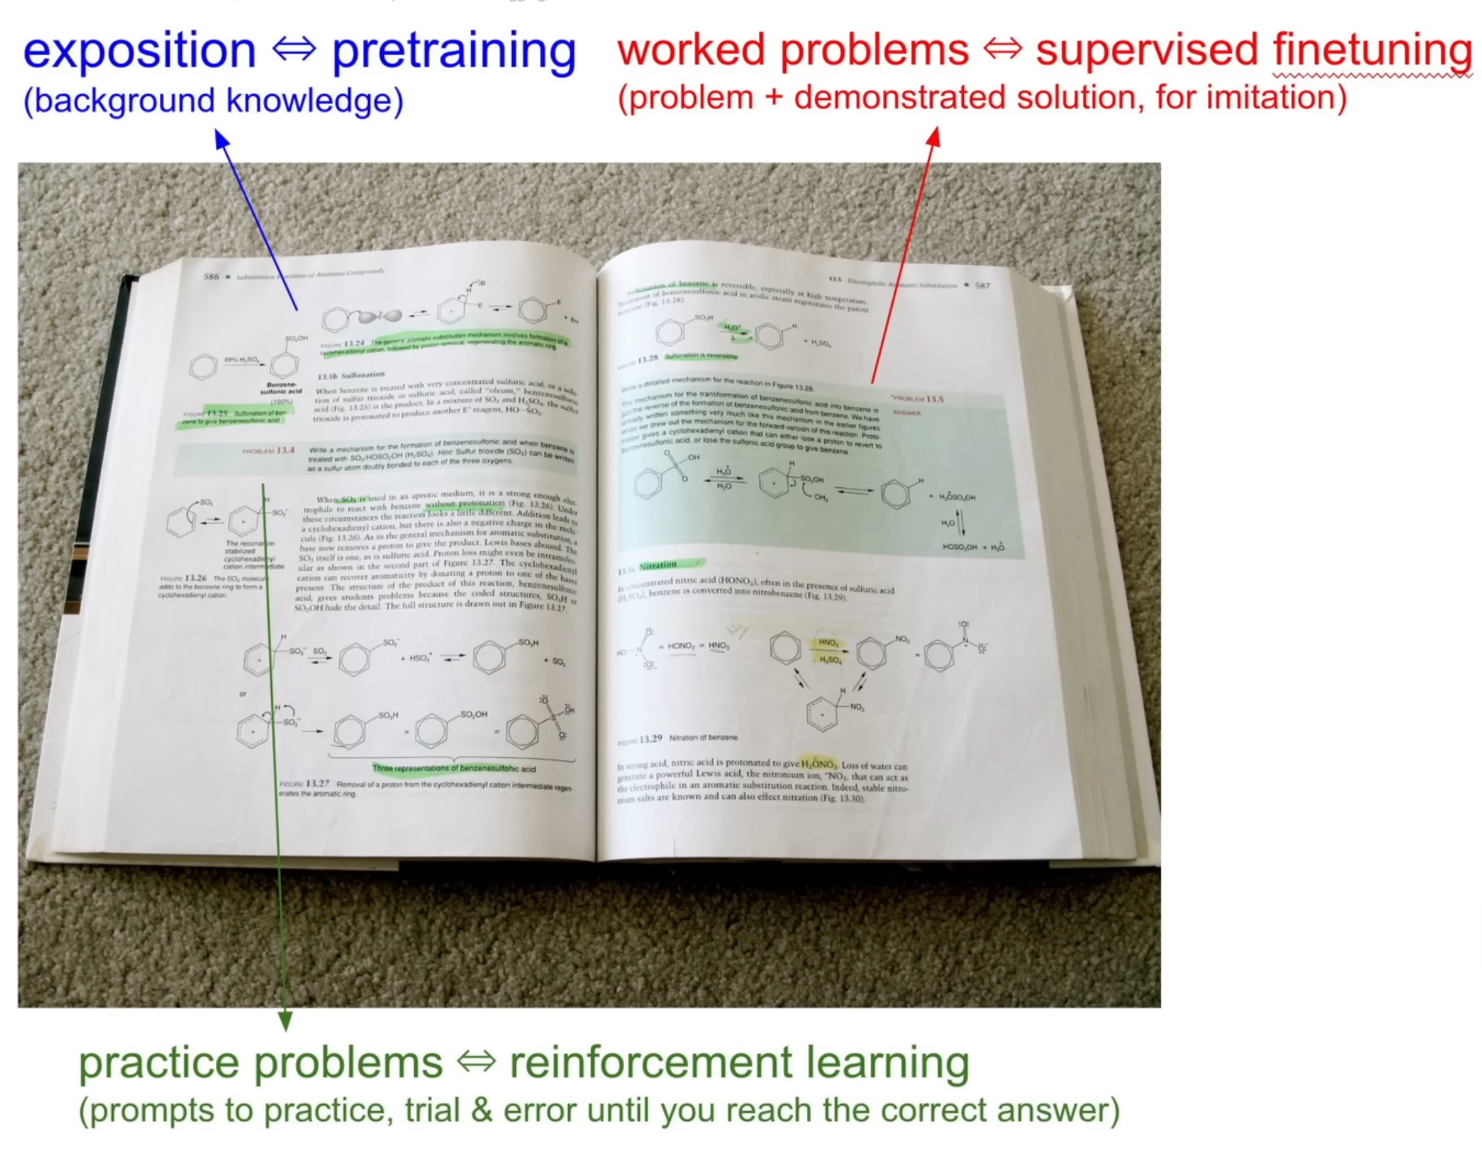

# 16. Reinforcement Learning

문제 의식 :우리는 LLM이 아니기 때문에, 어떠한 "중간 과정"을 거쳐서 $3에 이르는 것이 모델이 정답을 만들어내는데에 도움이 되는지 모름!
(우리와 LLM의 인지체계가 다르기 때문에, 우리에게 쉬운 것이 LLM에게 어렵고, vice versa)

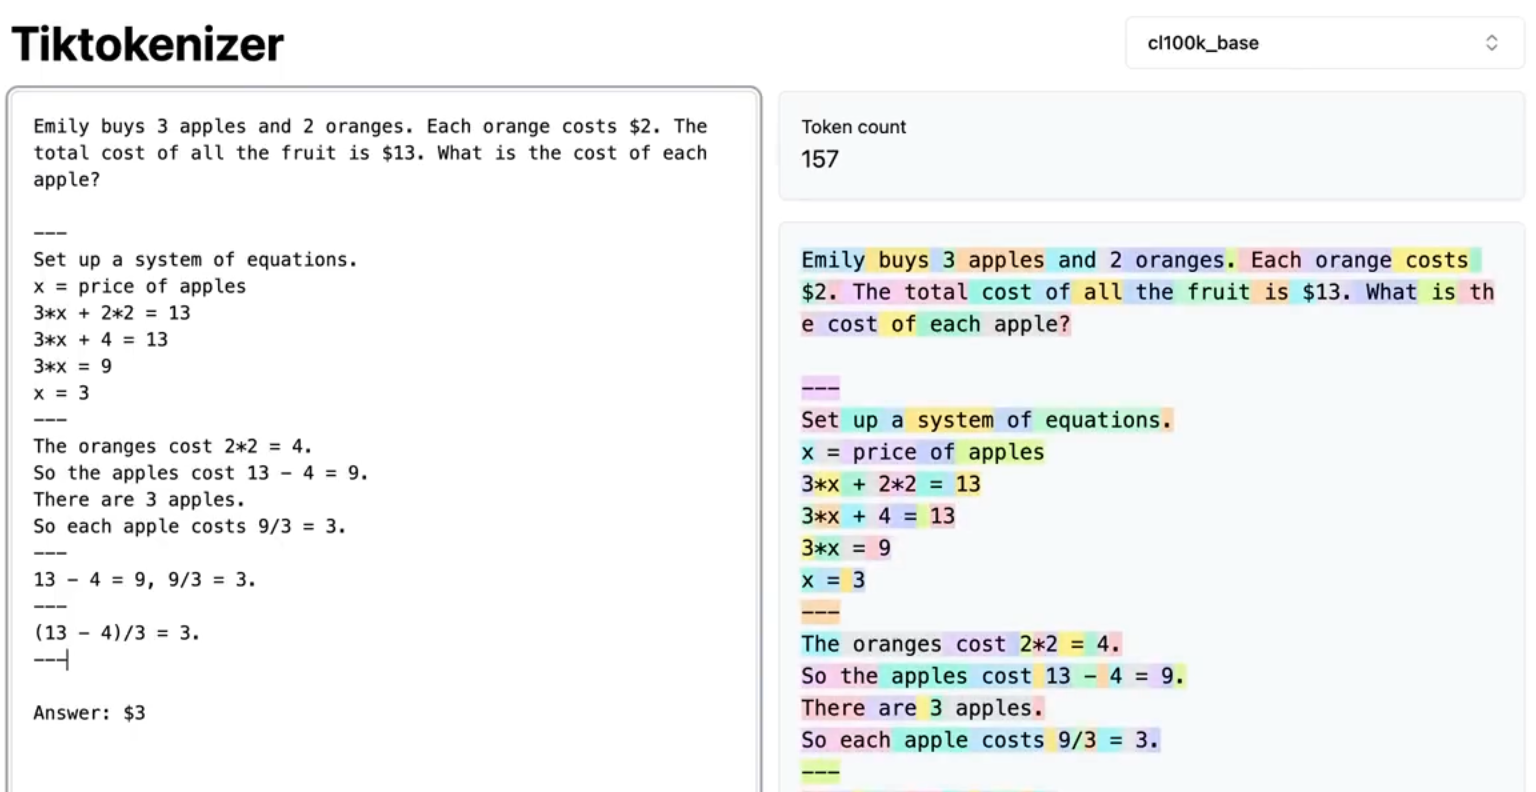


따라서 질문과 최종정답만을 모델에게 쥐어주고, RL을 통해서 모델이 스스로 SOLUTION을 깨닫게 하는 수 밖에 없다.

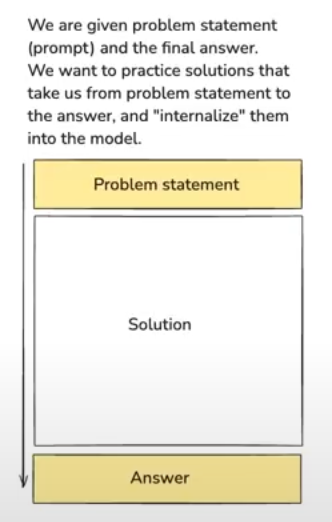

초록색은 $3이라는 정답에 잘 도달했고, 붉은 색은 틀렸다면,

몇가지 변용이 가능하겠지만, 간단하게는, "정답을 맞췄으면서 가장 짧은 답변"을 가장 좋은 답변으로 선정해서 학습시키는 방법 등을 적용하여,

가장 좋은 답변을 선정하고, 이 답변을 기반으로 모델을 학습시키면 됨.

<-- 이 중간 과정 _Solution들이 LLM에 의해 만들어진 것이기 때문에, 여기에는 사람이 개입할 필요 없음-! :D

이 과정을 반복함으로써, 수학/물리 등의 정답을 찾아가는 과정에서 모델 스스로 (사람은 찾을 수 없는) 최적의 token sequence를 발견하게 됨.

** 이 앞부분 SFT model로부터 왔다는 맥락에서 생각해보면, SFT model은 solution을 찾는 과정에서 초기화를 잘 시켜줌으로써 돕는 역할을 하는 것이고, RL은 중간 solution에 대해서 최적의 답변을 찾을 수 있도록 조정하는 보다 직접적인 과정이라고 볼 수 있음. 

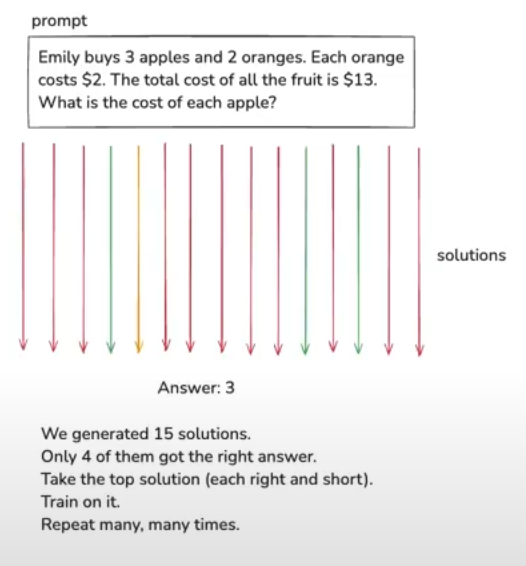

참고로, 좌측 그림에서 아이들이 공부하는 방식과 차이점이라면,

아이들은 '각 영역별'로 [ (1) exposition을 다 읽고, (2) 전문가의 해법을 읽고 (3) 스스로 문제를 푸는 ] 과정을 진행하지만,

LLM 모델은 [ (1) "모든 영역에 대해서" 교과서를 다 읽고 _pretraining ] -> [ (2) "모든 영역에 대해서" 전문가의 해설을 읽고 _SFT ] -> [ (3) "모든 영역에 대해서" 스스로 문제를 푸는 _RL ] 과정이 진행되는 차이가 있음.

이런 부분을 제외하면 큰 틀에서 아이들이 학습하는 것과 모델의 학습 방식은 동일하다고 볼 수 있다.

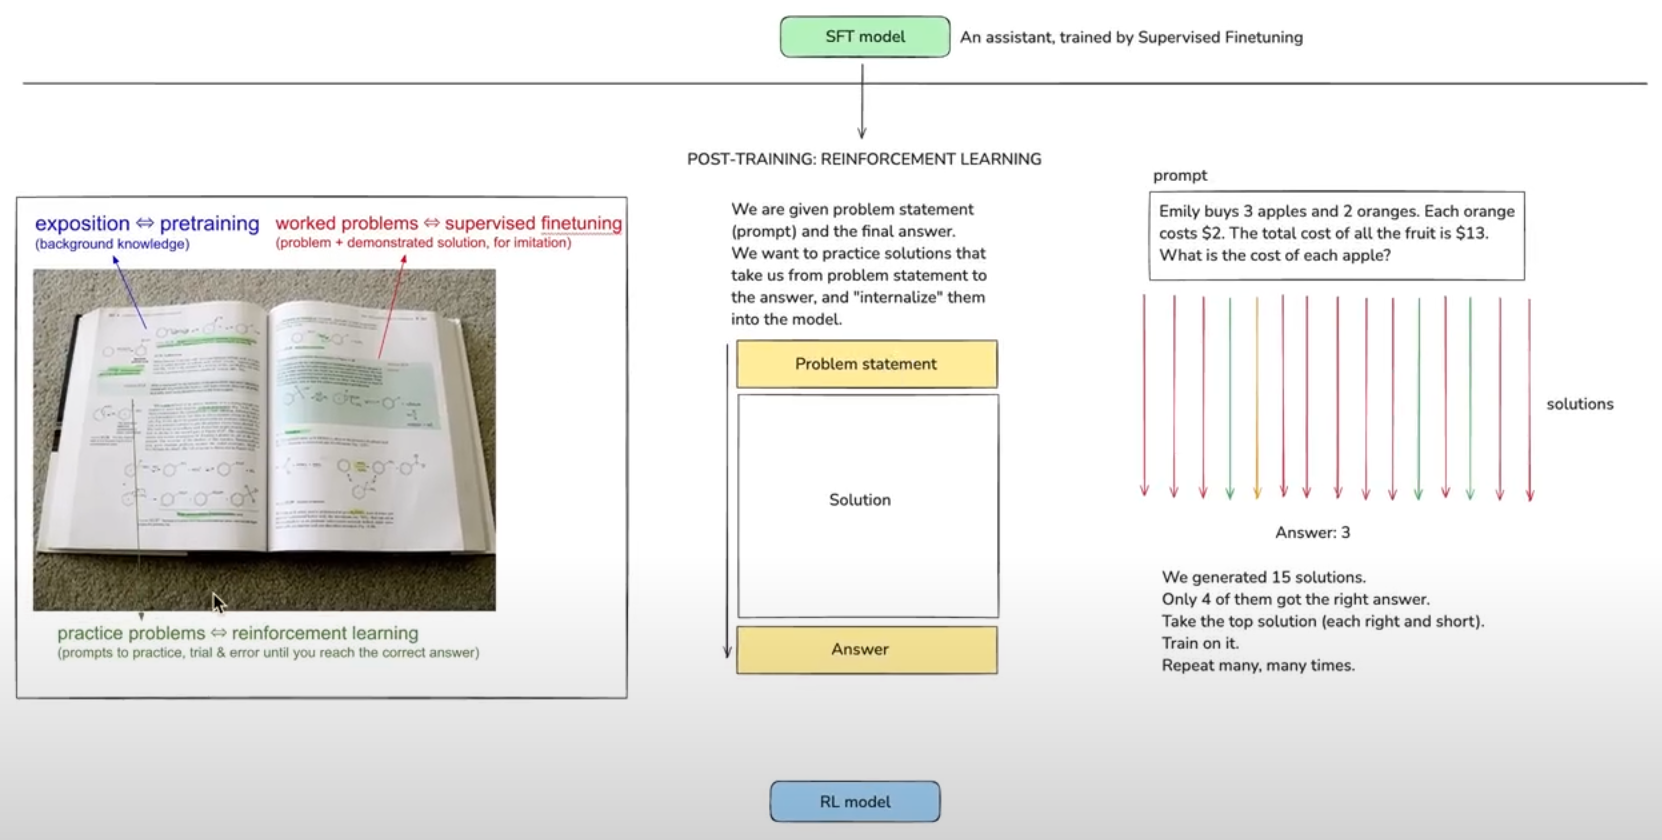